In [2]:
%load_ext autoreload

In [3]:
%matplotlib inline
%autoreload 1
import pickle
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import numpy.typing as npt
import pandas as pd

from tqdm.auto import tqdm
from tqdm.contrib.concurrent import process_map

%aimport util
from plot_helper import *

Matplotlib Version: 3.6.3


In [4]:
for sim in util.simulations:
    print(sim, util.system_compositions[int(sim)])

1 {'POPC': 12, 'DOPC': 46, 'POPE': 3, 'DOPE': 27, 'CDL1': 12, 'CDL2': 0, 'POPG': 0, 'DOPG': 0}
2 {'POPC': 26, 'DOPC': 25, 'POPE': 8, 'DOPE': 29, 'CDL1': 12, 'CDL2': 0, 'POPG': 0, 'DOPG': 0}
3 {'POPC': 34, 'DOPC': 22, 'POPE': 14, 'DOPE': 18, 'CDL1': 12, 'CDL2': 0, 'POPG': 0, 'DOPG': 0}
4 {'POPC': 10, 'DOPC': 55, 'POPE': 2, 'DOPE': 22, 'CDL1': 0, 'CDL2': 0, 'POPG': 6, 'DOPG': 5}
5 {'POPC': 20, 'DOPC': 34, 'POPE': 7, 'DOPE': 25, 'CDL1': 0, 'CDL2': 0, 'POPG': 12, 'DOPG': 2}
6 {'POPC': 34, 'DOPC': 20, 'POPE': 14, 'DOPE': 18, 'CDL1': 0, 'CDL2': 0, 'POPG': 12, 'DOPG': 2}
7 {'POPC': 0, 'DOPC': 0, 'POPE': 0, 'DOPE': 0, 'CDL1': 100, 'CDL2': 0, 'POPG': 0, 'DOPG': 0}
8 {'POPC': 50, 'DOPC': 0, 'POPE': 30, 'DOPE': 0, 'CDL1': 20, 'CDL2': 0, 'POPG': 0, 'DOPG': 0}
9 {'POPC': 0, 'DOPC': 50, 'POPE': 0, 'DOPE': 30, 'CDL1': 20, 'CDL2': 0, 'POPG': 0, 'DOPG': 0}
10 {'POPC': 50, 'DOPC': 0, 'POPE': 30, 'DOPE': 0, 'CDL1': 0, 'CDL2': 0, 'POPG': 0, 'DOPG': 20}
11 {'POPC': 0, 'DOPC': 50, 'POPE': 0, 'DOPE': 30, 'CD

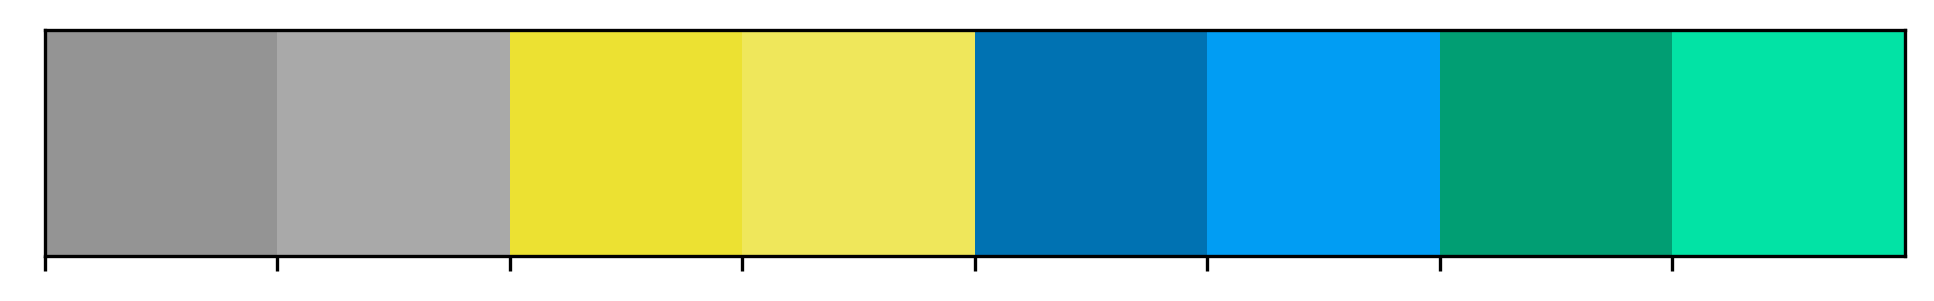

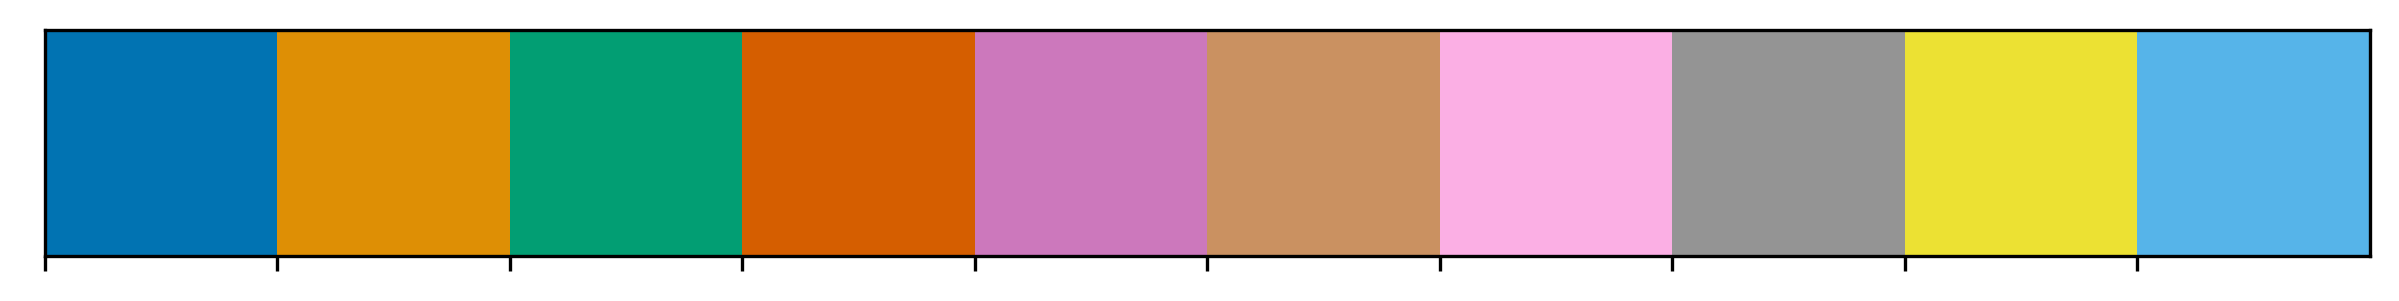

In [5]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

light_factor = 0.8

p = sns.color_palette('colorblind')

palette = [lighten_color(p[i], j) for i, j in [(7, 1),(7, light_factor),(8,1),(8,light_factor),(0,1),(0,light_factor),(2,1),(2,light_factor)]]

sns.palplot(palette)
sns.palplot(p)

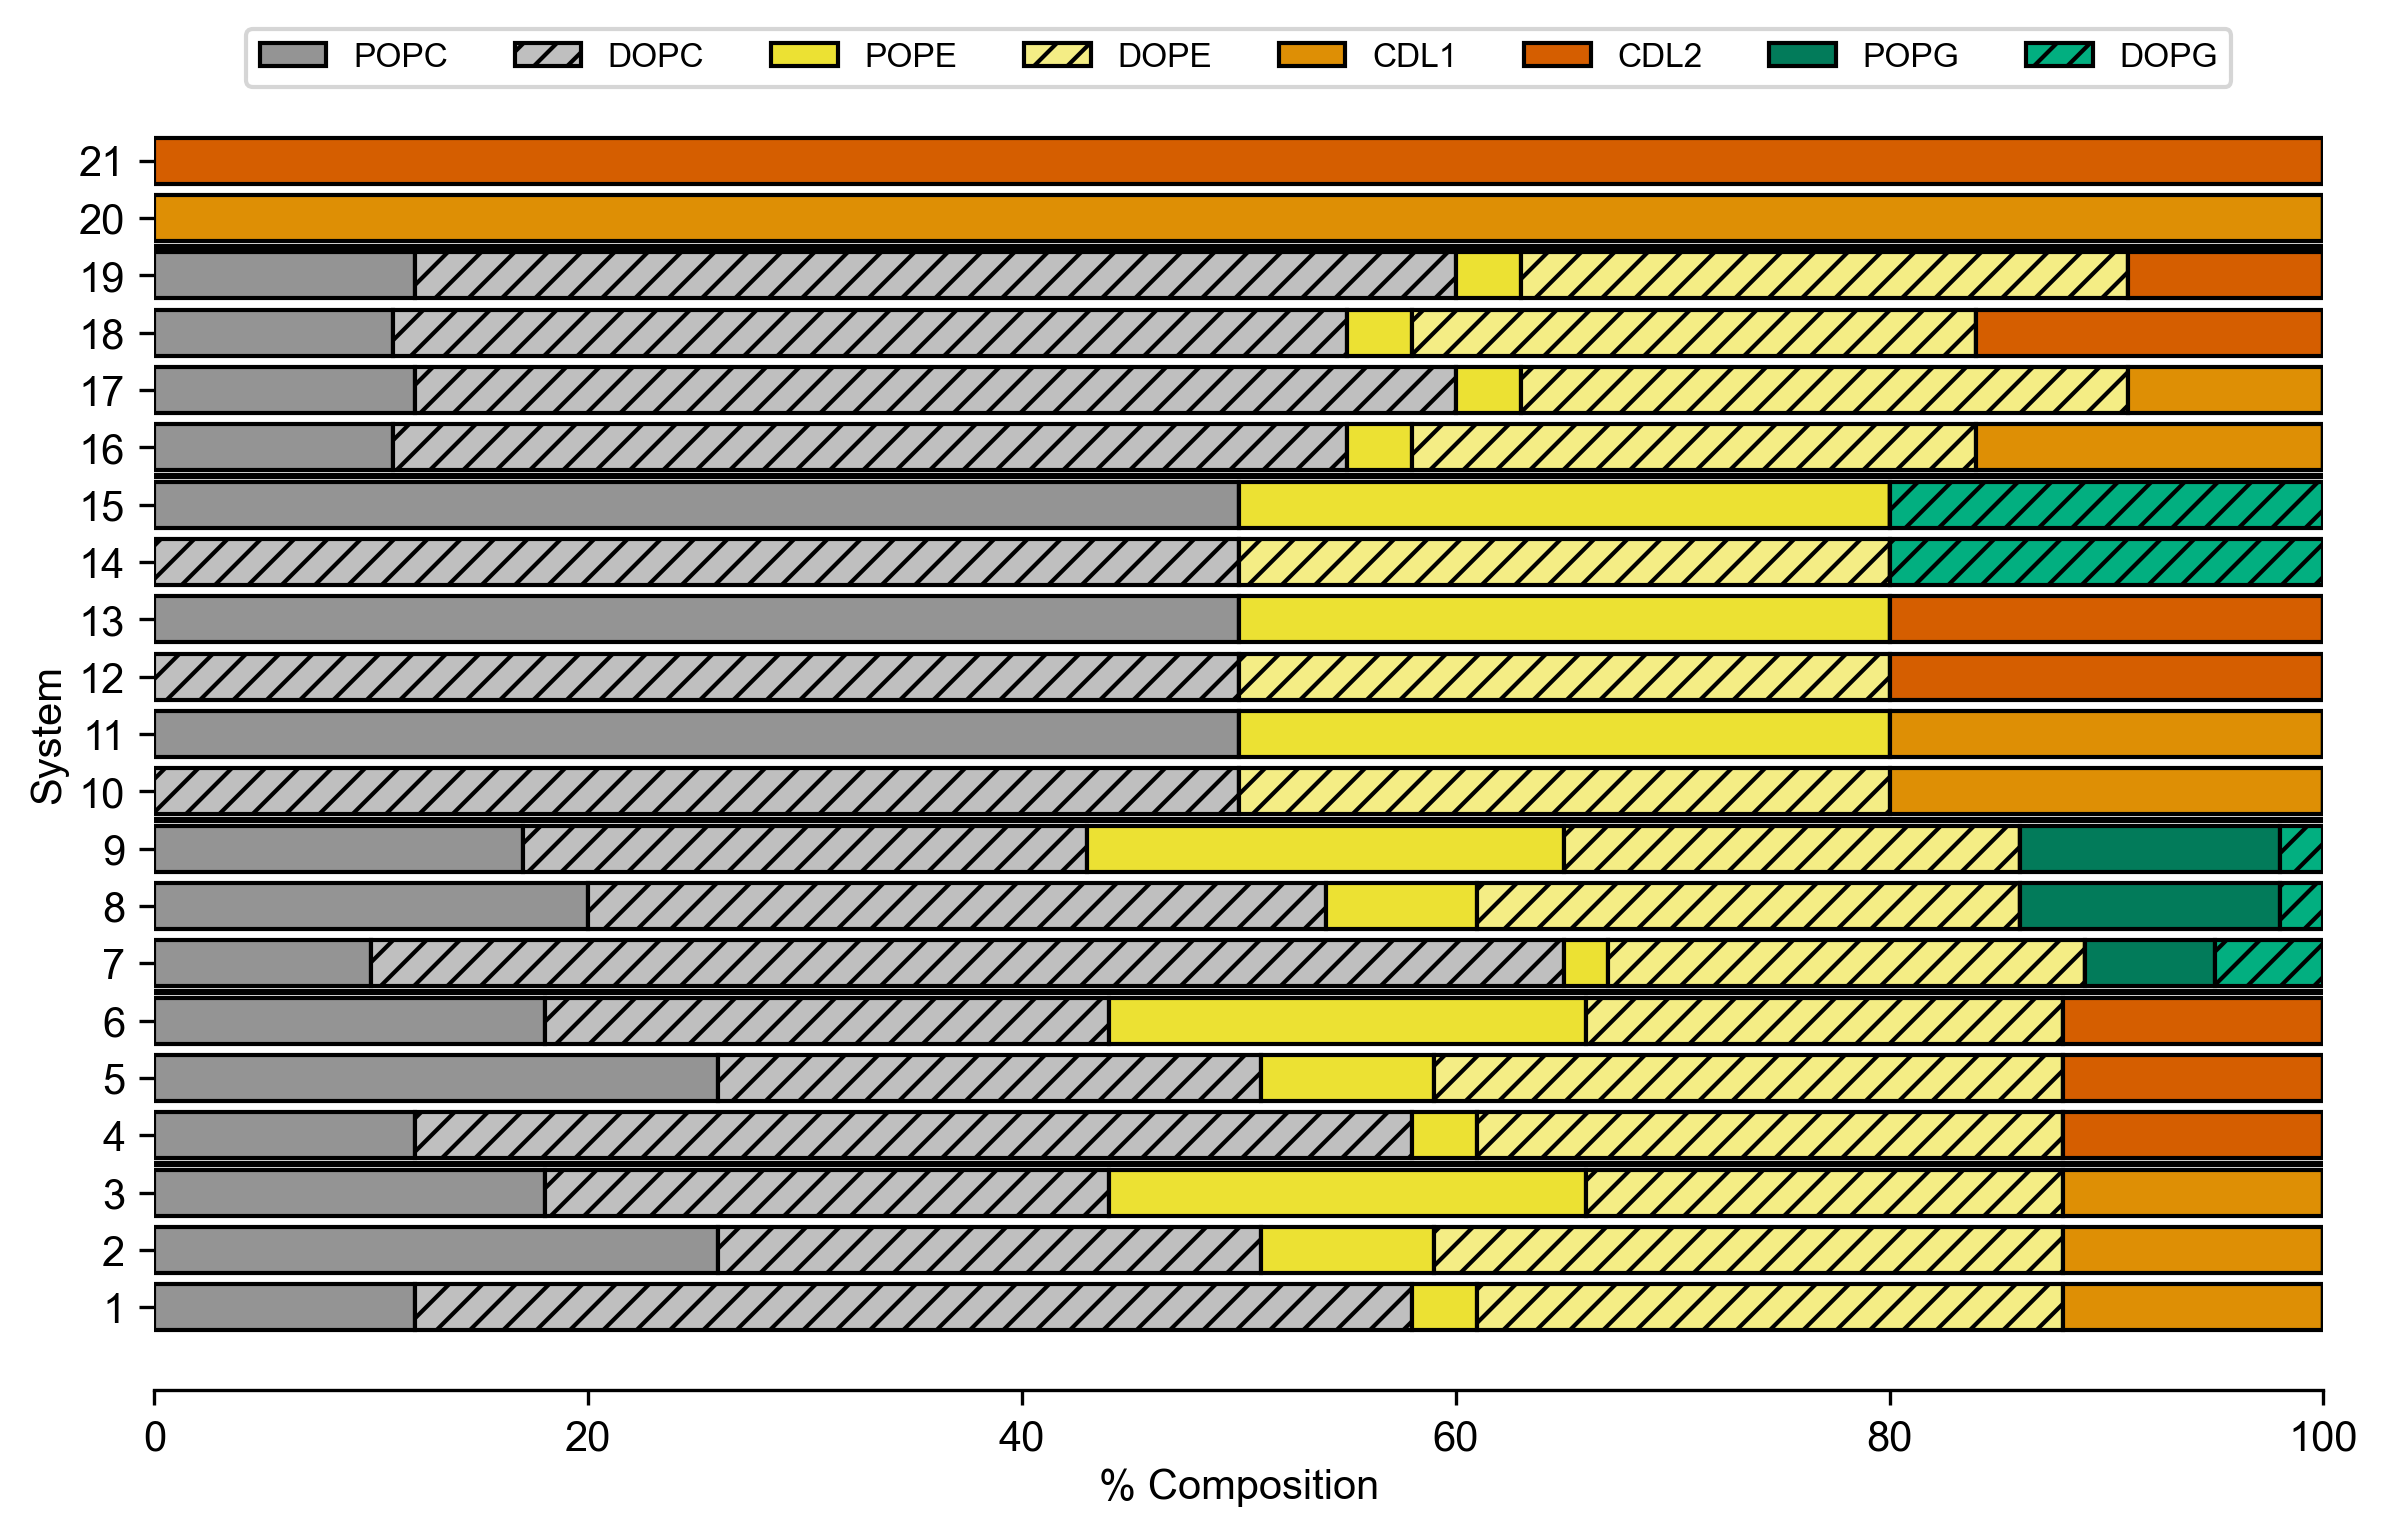

In [15]:
show_figs = True
curr_fig_path = Path("Figures/")
curr_fig_path.mkdir(parents=True, exist_ok=True)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

lipid_names = ["POPC", "DOPC", "POPE", "DOPE", "CDL1", "CDL2", "POPG", "DOPG"]

pal = sns.color_palette("colorblind")
light_factor = 0.6
bar_props = [
    (7, 1, None),
    (7, light_factor, "///"),
    (8, 1, None),
    (8, light_factor, "///"),
    (1, 1, None),
    (3, 1, None),
    (2, 1.1, None),
    (2, 0.95, "///"),
]


for sim in util.simulations:
    if int(sim) not in util.remapping_dict:
        continue

    composition = util.system_compositions[util.remapping_dict[int(sim)]]
    p = list()
    values = [composition[lipid] for lipid in lipid_names]
    for i, value in enumerate(values):
        b = bar_props[i]
        p.append(
            ax.barh(
                sim,
                value,
                left=np.sum(values[0:i]),
                color=lighten_color(pal[b[0]], b[1]),
                hatch=b[2],
                linewidth=1,
                edgecolor="k",
                height=0.8,
            )
        )

    # p = plt.barh(sim, values)
    # for lipid in lipid_names[1:-1]:
    #     p = plt.barh(sim, composition[lipid], left=p)

ax.axhline(2.5, color="k")
ax.axhline(5.5, color="k")
ax.axhline(8.5, color="k")
ax.axhline(14.5, color="k")
ax.axhline(18.5, color="k")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.set_ylabel("System")
ax.set_xlabel("% Composition")

fig.tight_layout()


# # Shrink current axis by 20%
box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width, box.height*0.9])
ax.legend(p, lipid_names, loc="upper center", ncols=8, bbox_to_anchor=(0.5,1.05))
fig.savefig(curr_fig_path/f"remapped_Compositions.png", format="png", transparent=True)
fig.savefig(curr_fig_path/f"remapped_Compositions.pdf", format="pdf", transparent=True)

if show_figs:
    plt.show()

fig.clear()
plt.close(fig)
